In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

In [2]:
np.random.seed(42)
from sklearn.metrics import confusion_matrix

In [3]:
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [4]:
skin_df = pd.read_csv('archive/HAM10000_metadata.csv')
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [5]:
SIZE=32

In [6]:
le=LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [7]:
skin_df['label']=le.transform(skin_df["dx"])
print(skin_df.sample(10))

        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extremity      5  
8984  lower extremity      5  
2310 

C:\Users\harsh\AppData\Local\Temp\ipykernel_17448\2782880090.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'],fit=stats.norm,color='red');


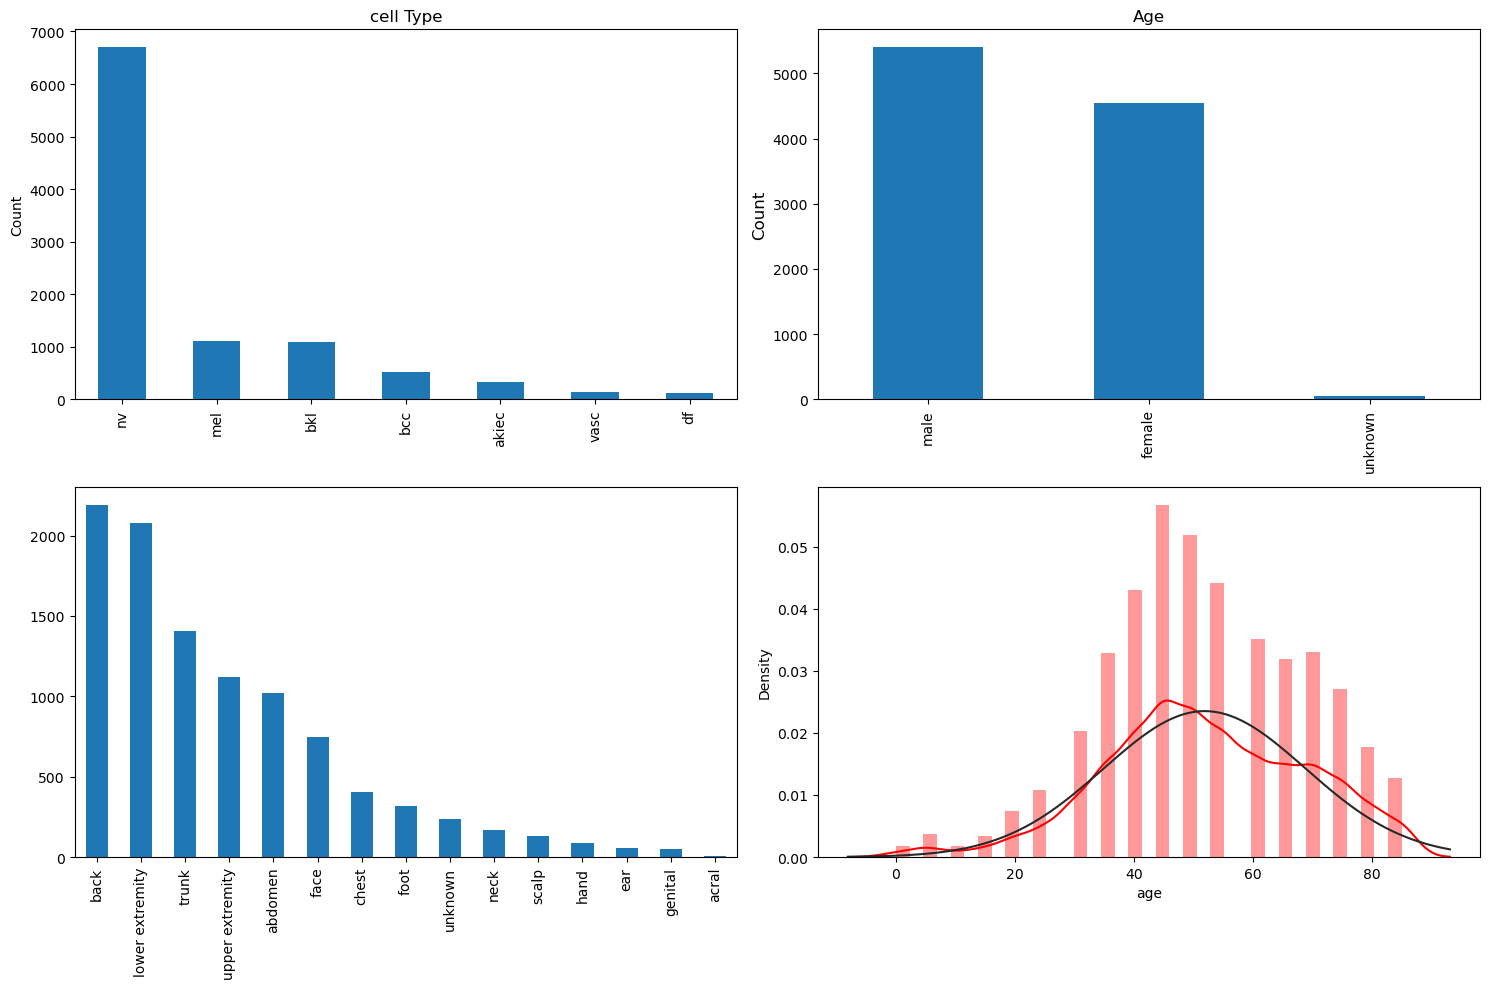

In [8]:
fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('cell Type')

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex')

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax2.set_ylabel('Count', size=12)
ax2.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age=skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'],fit=stats.norm,color='red');
ax2.set_title('Age')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.utils import resample
print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [10]:
df_0=skin_df[skin_df['label']==0]
df_1=skin_df[skin_df['label']==1]
df_2=skin_df[skin_df['label']==2]
df_3=skin_df[skin_df['label']==3]
df_4=skin_df[skin_df['label']==4]
df_5=skin_df[skin_df['label']==5]
df_6=skin_df[skin_df['label']==6]

In [11]:
n_samples =500
df_0_balanced = resample(df_0,replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1,replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2,replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3,replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4,replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5,replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6,replace=True, n_samples=n_samples, random_state=42)

In [12]:
skin_df_balanced = pd.concat([df_0_balanced,df_1_balanced,df_2_balanced,df_3_balanced,df_4_balanced,df_5_balanced,df_6_balanced])
print(skin_df_balanced['label'].value_counts())

0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64


In [14]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join('archive','*','*.jpg'))}
image_path

{'ISIC_0024306': 'archive\\HAM10000_images_part_1\\ISIC_0024306.jpg',
 'ISIC_0024307': 'archive\\HAM10000_images_part_1\\ISIC_0024307.jpg',
 'ISIC_0024308': 'archive\\HAM10000_images_part_1\\ISIC_0024308.jpg',
 'ISIC_0024309': 'archive\\HAM10000_images_part_1\\ISIC_0024309.jpg',
 'ISIC_0024310': 'archive\\HAM10000_images_part_1\\ISIC_0024310.jpg',
 'ISIC_0024311': 'archive\\HAM10000_images_part_1\\ISIC_0024311.jpg',
 'ISIC_0024312': 'archive\\HAM10000_images_part_1\\ISIC_0024312.jpg',
 'ISIC_0024313': 'archive\\HAM10000_images_part_1\\ISIC_0024313.jpg',
 'ISIC_0024314': 'archive\\HAM10000_images_part_1\\ISIC_0024314.jpg',
 'ISIC_0024315': 'archive\\HAM10000_images_part_1\\ISIC_0024315.jpg',
 'ISIC_0024316': 'archive\\HAM10000_images_part_1\\ISIC_0024316.jpg',
 'ISIC_0024317': 'archive\\HAM10000_images_part_1\\ISIC_0024317.jpg',
 'ISIC_0024318': 'archive\\HAM10000_images_part_1\\ISIC_0024318.jpg',
 'ISIC_0024319': 'archive\\HAM10000_images_part_1\\ISIC_0024319.jpg',
 'ISIC_0024320': 'ar

In [15]:
skin_df_balanced['path']=skin_df['image_id'].map(image_path.get)
skin_df_balanced['image']=skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

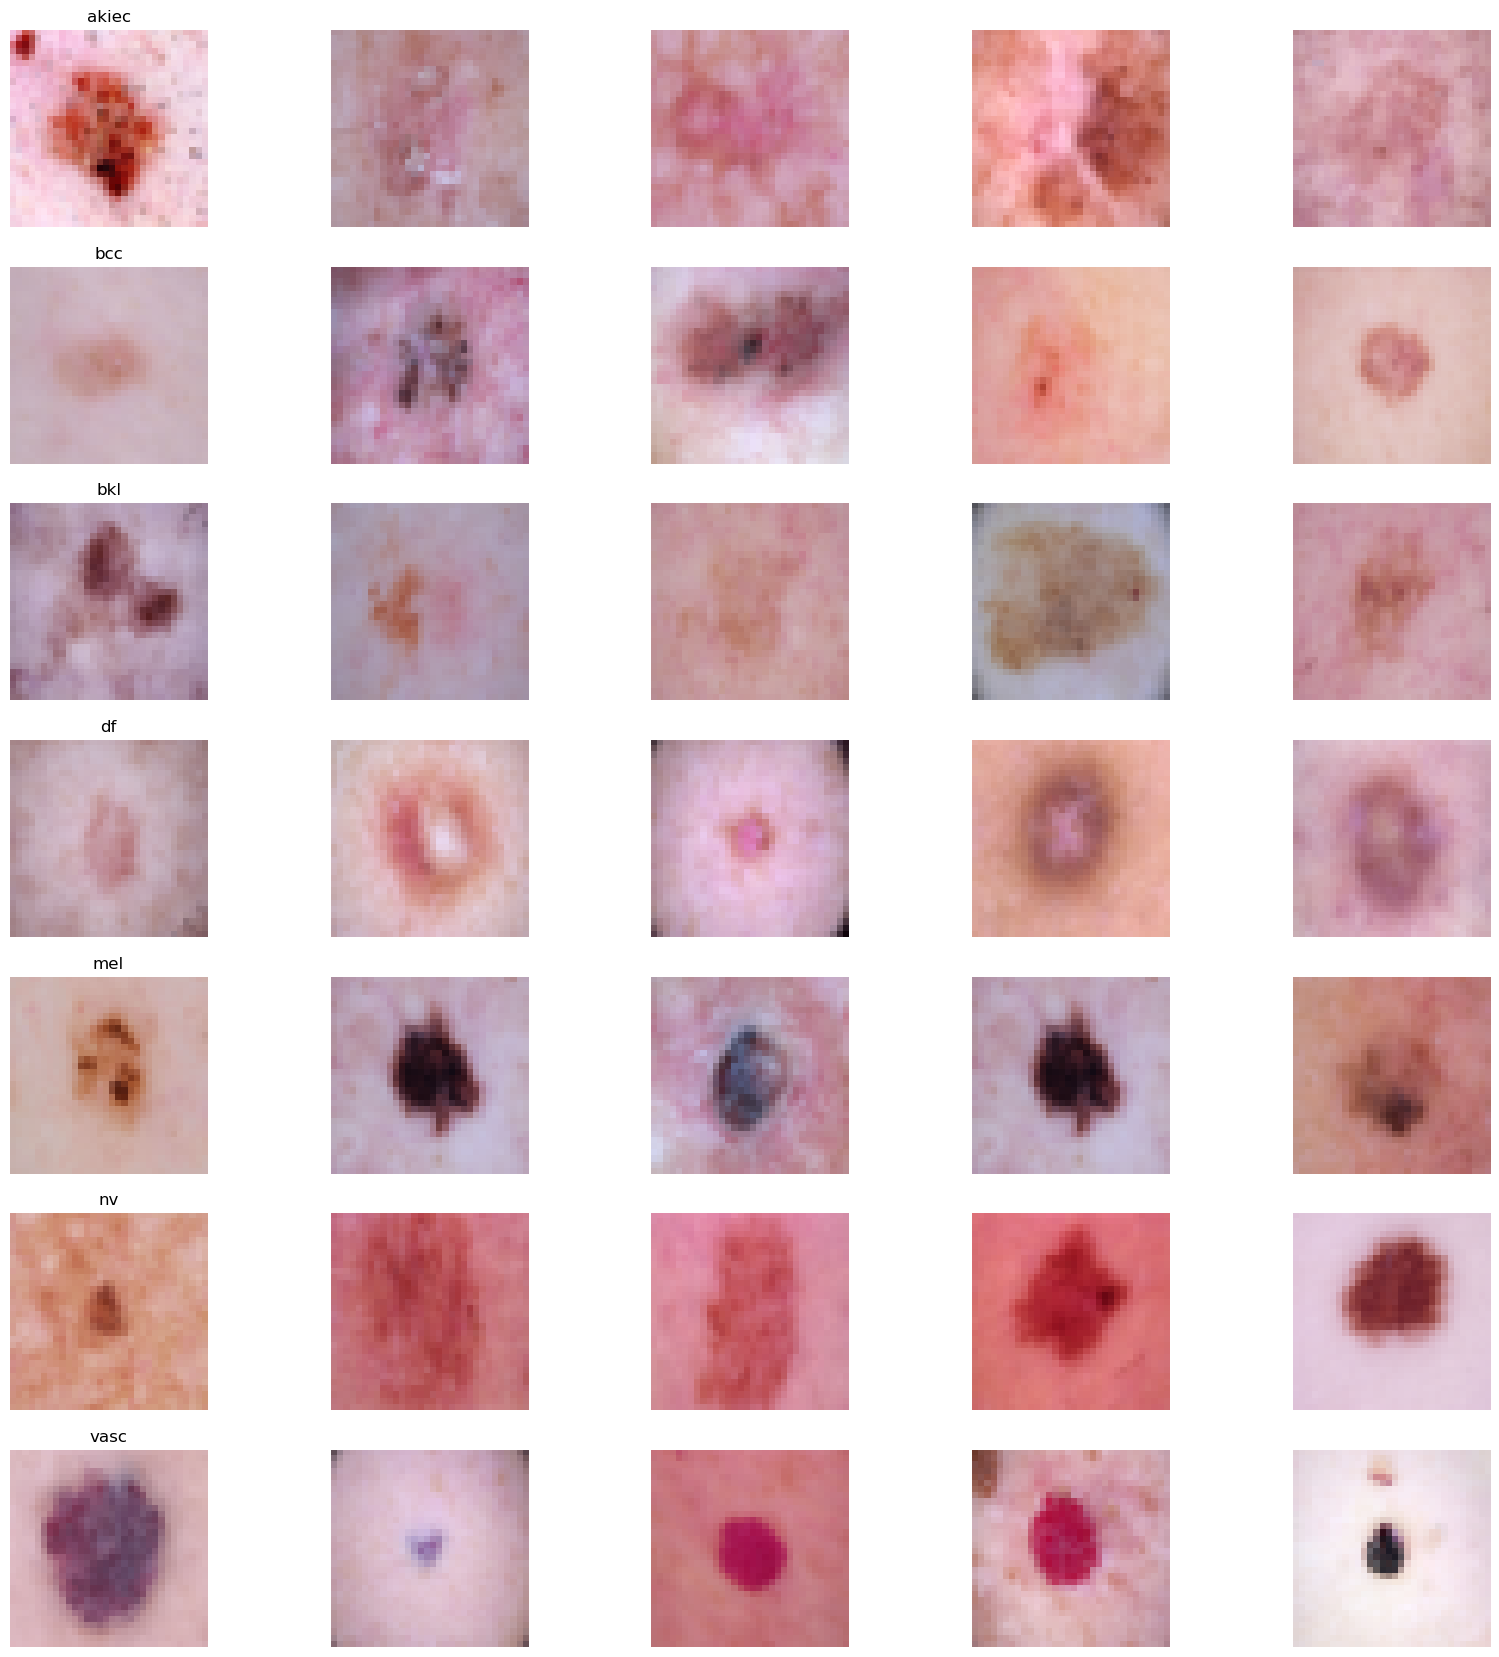

In [16]:
n_samples=5
fig,m_axs=plt.subplots(7,n_samples, figsize = (4*n_samples,3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax,(_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
            c_ax.imshow(c_row['image'])
            c_ax.axis('off')

In [17]:
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.
Y=skin_df_balanced['label']
Y_cat= to_categorical(Y, num_classes=7)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat,test_size = 0.25,random_state=42)

In [19]:
num_classes=7

model = Sequential()
model.add(Conv2D(256,(3,3), activation = "relu",input_shape=(SIZE,SIZE,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['acc'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [20]:
batch_size =16
epochs =50

history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size, validation_data=(x_test,y_test),verbose=2)
score=model.evaluate(x_test,y_test)
print('Test accuracy:',score[1])

Epoch 1/50
165/165 - 11s - loss: 1.9040 - acc: 0.1844 - val_loss: 1.8137 - val_acc: 0.2491 - 11s/epoch - 68ms/step
Epoch 2/50
165/165 - 9s - loss: 1.7481 - acc: 0.2712 - val_loss: 1.7584 - val_acc: 0.2811 - 9s/epoch - 52ms/step
Epoch 3/50
165/165 - 7s - loss: 1.5796 - acc: 0.3509 - val_loss: 1.5474 - val_acc: 0.3600 - 7s/epoch - 45ms/step
Epoch 4/50
165/165 - 10s - loss: 1.4570 - acc: 0.4038 - val_loss: 1.6923 - val_acc: 0.3589 - 10s/epoch - 60ms/step
Epoch 5/50
165/165 - 8s - loss: 1.4495 - acc: 0.4240 - val_loss: 1.4015 - val_acc: 0.4274 - 8s/epoch - 49ms/step
Epoch 6/50
165/165 - 8s - loss: 1.4013 - acc: 0.4419 - val_loss: 1.3759 - val_acc: 0.4251 - 8s/epoch - 50ms/step
Epoch 7/50
165/165 - 8s - loss: 1.3461 - acc: 0.4598 - val_loss: 1.4068 - val_acc: 0.4297 - 8s/epoch - 49ms/step
Epoch 8/50
165/165 - 8s - loss: 1.3032 - acc: 0.4823 - val_loss: 1.3164 - val_acc: 0.4971 - 8s/epoch - 49ms/step
Epoch 9/50
165/165 - 8s - loss: 1.2778 - acc: 0.5059 - val_loss: 1.2483 - val_acc: 0.4937 - 

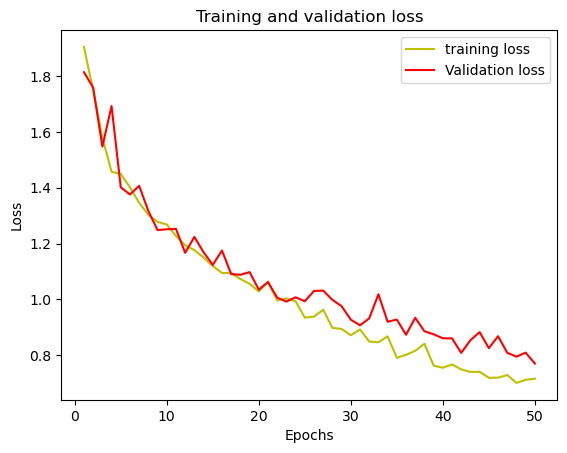

In [23]:
loss=history.history['loss']
val_loss =history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

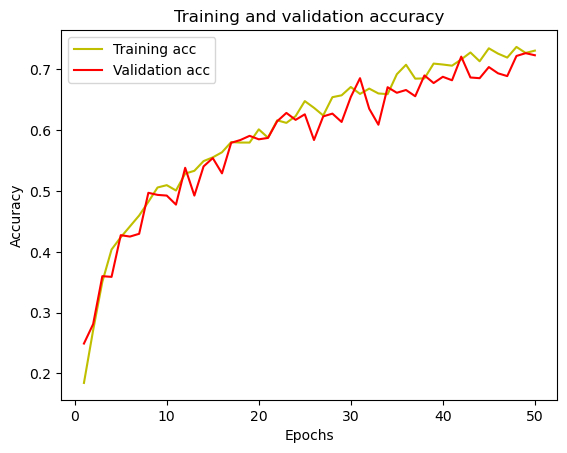

In [24]:
acc=history.history['acc']
val_acc =history.history['val_acc']
plt.plot(epochs,acc,'y',label='Training acc')
plt.plot(epochs, val_acc,'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
y_pred = model.predict(x_test)


28/28 [==============================] - 1s 31ms/step


In [26]:
y_pred_classes = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)
cm= confusion_matrix(y_true,y_pred_classes)
cm

array([[ 90,  23,  22,  10,   3,   1,   0],
       [ 12,  77,  17,  13,   2,   5,   2],
       [  4,   5,  85,   4,  18,   4,   0],
       [  0,   7,   2, 119,   0,   0,   0],
       [  5,   3,  19,   0,  74,  10,   1],
       [  3,   2,  17,   2,  24,  65,   0],
       [  0,   0,   0,   0,   0,   2, 123]], dtype=int64)

<Axes: >

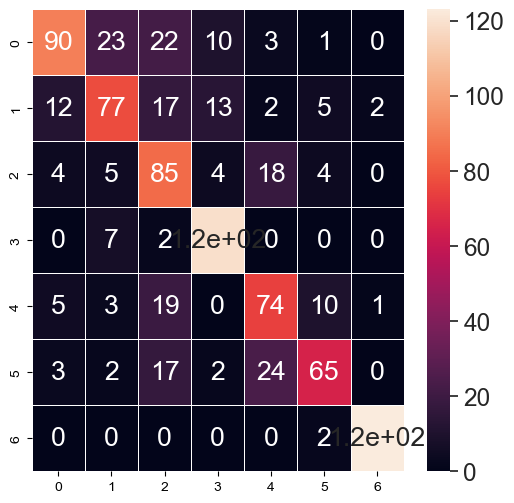

In [27]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm,annot=True, linewidths=.5, ax=ax)


Text(0, 0.5, 'Fraction of incorrect predictions')

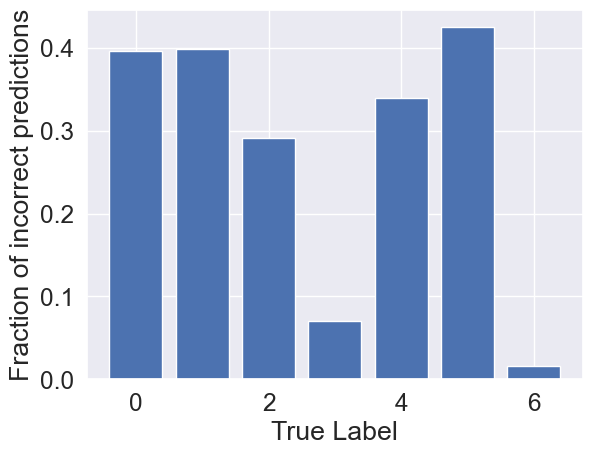

In [28]:
incorr_fraction = 1-np.diag(cm)/np.sum(cm,axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [29]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('skin_cancer.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 256)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6,

In [31]:
# Part 3 - Making new predictions

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('ISIC_0024322.jpg', target_size = (32, 32))
test_image1 = image.img_to_array(test_image)
test_image1 = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image1)
print(result)
#training_set.class_indices
if result[0][0] == 1:
    prediction = 'skin cancer is Actinic Keratoses'
    print(prediction)
elif result[0][1]==1:
    prediction = 'skin cancer is Basal cell carcinoma'
    print(prediction)
elif result[0][2] == 1:
    prediction = 'skin cancer is Benign Keratosis-like lesions'
    print(prediction)
elif result[0][3] == 1:
    prediction = 'skin cancer is Dermatofibroma'
    print(prediction)
elif result[0][4] == 1:
    prediction = 'skin cancer is Melanoma'
    print(prediction)
elif result[0][5] == 1:
    prediction = 'skin cancer is Melanocytic nevi'
    print(prediction)
else:
    prediction = 'skin cancer is Vascular lesions'
    print(prediction)


1/1 [==============================] - 0s 159ms/step
[[0. 0. 0. 0. 0. 1. 0.]]
skin cancer is Melanocytic nevi


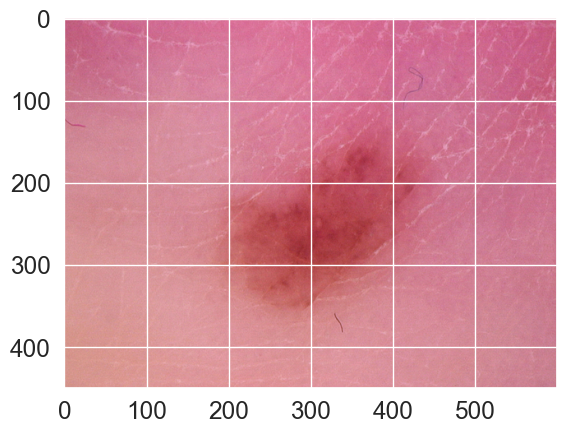

Model prediction : skin cancer is Melanocytic nevi


In [33]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread

# load image pixels
image = imread('ISIC_0024322.jpg')
# plot raw pixel data
pyplot.imshow(image)
# show the figure
pyplot.show()

print("Model prediction :", prediction)

In [34]:
from tensorflow.keras.models import load_model

model = load_model('skin_cancer.h5')
# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(x_test,y_test)
print('test loss, test acc:', results)


# Evaluate on test data
28/28 [==============================] - 1s 36ms/step - loss: 0.8307 - acc: 0.7120
test loss, test acc: [0.8307417035102844, 0.7120000123977661]


In [35]:
!pip install streamlit==1.1.0

     ---------------------------------------- 8.3/8.3 MB 10.2 MB/s eta 0:00:00
     -------------------------------------- 471.5/471.5 kB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 11.8 MB/s eta 0:00:00
     --------------------------------------- 21.5/21.5 MB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 184.3/184.3 kB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 82.8/82.8 kB ? eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
     ------------------------------------- 341.8/341.8 kB 10.7 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19591 sha256=60756c9fc7f346d1f70c7d03b23a030b637ddd3f475ca5a4f20be00cb7df1708
  Stored in directory: c:\users\harsh\appdata\local\pip\cache\wheels\2d\55\25\123071088f4e466746cbadc923b1a31e08cea

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 2.2.2 requires click>=8.0, but you have click 7.1.2 which is incompatible.
black 22.6.0 requires click>=8.0.0, but you have click 7.1.2 which is incompatible.


In [43]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('skin_cancer.h5')

html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">AI and data Science  Master Classes </p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        skin cancer classification
         """
         )
file= st.file_uploader("Please upload image", type=("jpg"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
    #x = cv2.resize(image_data, (48, 48)) 
    #img = image.load_img(image_data, target_size=(48, 48))
    #x = image.img_to_array(img)
    size=(32,32)
    image=ImageOps.fit(image_data, size, Image.ANTIALIAS)
    img=np.asarray(image)
    img_reshape=np.expand_dims(img, axis=1)
    img_reshape=img[np.newaxis,...]
    result = model.predict(img_reshape)
    print(result)
    #training_set.class_indices
    if result[0][0] == 1:
        prediction = 'skin cancer is Actinic Keratoses'
        print(prediction)
    elif result[0][1]==1:
        prediction = 'skin cancer is Basal cell carcinoma'
        print(prediction)
    elif result[0][2] == 1:
        prediction = 'skin cancer is Benign Keratosis-like lesions'
        print(prediction)
    elif result[0][3] == 1:
        prediction = 'skin cancer is Dermatofibroma'
        print(prediction)
    elif result[0][4] == 1:
        prediction = 'skin cancer is Melanoma'
        print(prediction)
    elif result[0][5] == 1:
        prediction = 'skin cancer is Melanocytic nevi'
        print(prediction)
    else:
        prediction = 'skin cancer is Vascular lesions'
        print(prediction)
  
      return prediction
if file is None:
    st.text("Please upload an Image of Skin")
else:
    image=Image.open(file)
    #image=np.array(image)
    #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
    #image = cv2.imdecode(file_bytes, 1)
    st.image(image,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Predict skin cancer"):
    result=import_and_predict(image)
    st.success('Model has predicted the image  is  of  {}'.format(result))
if st.button("About"):
    st.header("Harsh bansal")
    st.subheader("student of poornima institute of engineering and technology")
  
html_temp = """
    <div class="" style="background-color:orange;" >
    <div class="clearfix">           
    <div class="col-md-12">
    <center><p style="font-size:20px;color:white;margin-top:10px;">Image Classification Project. 14</p></center> 
    </div>
    </div>
    </div>"""
st.markdown(html_temp,unsafe_allow_html=True)

Overwriting app.py
